This code is completely running in cloud. For local purpose changes have to be made.

---

Input : data is Stored in drive.

Code : Stored in GitHub

Enable GPU from Runtime->change runtime type from "Runtime" Menu.

Then,

In [ ]:
!nvidia-smi

Tue Dec 15 10:33:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Installing Dependencies and Libraries

In [ ]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ssqbi4no
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ssqbi4no
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266454 sha256=35037ee9bbbf78a831b65a36aa8476a3f642deee9127177c09287b04d4b8135f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_umncqqu/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools


Enabling Nvidia apex

In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 7865 (delta 7), reused 8 (delta 0), pack-reused 7835
Receiving objects: 100% (7865/7865), 13.98 MiB | 26.04 MiB/s, done.
Resolving deltas: 100% (5356/5356), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-65los7ns
Created temporary directory: /tmp/pip-req-tracker-5qyk69io
Created requirements tracker '/tmp/pip-req-tracker-5qyk69io'
Created temporary directory: /tmp/pip-install-75ik3bc6
Processing /content/yolov5/apex
  Created temporary directory: /tmp/pip-req-build-jdzvig9a
  Added file:///content/yolov5/apex to build tracker '/tmp/pip-req-tracker-5qyk69io'
    Runn

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries that are needed

In [ ]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

Cloning YOLOv5 from github to yolov5 directory

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Cloning into 'yolov5'...
remote: Enumerating objects: 3319, done.
remote: Total 3319 (delta 0), reused 0 (delta 0), pack-reused 3319
Receiving objects: 100% (3319/3319), 6.50 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (2216/2216), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


Downloading flower.yaml file from drive

In [ ]:
#https://drive.google.com/file/d/1F8X_Rj2QncFTm--8mhE1j0tKIF1Carej/view?usp=sharing
!gdown --id 1F8X_Rj2QncFTm--8mhE1j0tKIF1Carej -O data/flower.yaml

Downloading...
From: https://drive.google.com/uc?id=1KG3R8SCPNcERB1PCiOnpVIKJXRqiJnUA
To: /content/yolov5/data/flower.yaml
100% 403/403 [00:00<00:00, 341kB/s]


Downloading yolov5x.yaml configuration file from drive

In [ ]:
#https://drive.google.com/file/d/1xg_vRo-5QN0WMU_BQ7m8DRLu3CcW8uJl/view?usp=sharing
!gdown --id 1xg_vRo-5QN0WMU_BQ7m8DRLu3CcW8uJl -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=198MoaDSONFVKDN-JJMgBLwPz_4xIug_r
To: /content/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 2.37MB/s]


In [ ]:
pwd

'/content/yolov5'

In [ ]:
cd yolov5/

/content/yolov5


Training with batch size 4 and epoch 100

Output will be named yolov5x_flower

In [ ]:
!python train.py --img 640 --batch 4 --epochs 100 \
  --data ./data/flower.yaml --cfg ./models/yolov5x.yaml \
  --name yolov5x_flower --cache

{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=12, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/flower.yaml', device='', epochs=200, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_flower', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-12-15 12:42:51.911066: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                                  argumen

Plotting results with plot_results function that is provided with YOLOv5

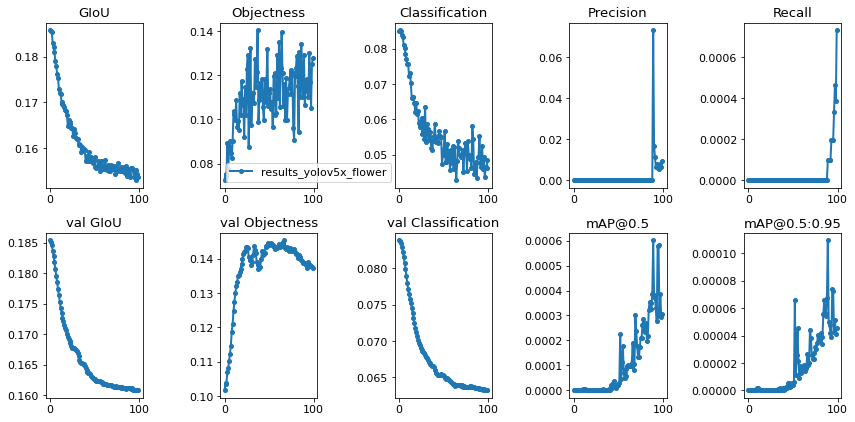

In [ ]:
from utils.utils import plot_results

plot_results();

Moving validation image from validation folder to /yolov5/inference/images/

In [ ]:
!find ../drive/MyDrive/ML/Flower_Segmentation_MultiClass/flower/images/val -maxdepth 1 -type f | xargs cp -t "./inference/images/"

Validation

In [ ]:
!python detect.py --weights weights/best_yolov5x_flower.pt \
  --img 640 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='weights/best_yolov5x_flower.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

image 1/12 inference/images/B56FF86D-8079-437C-9269-C052ED7CF7CC_1_105_c.jpg: 640x512 Done. (0.041s)
image 2/12 inference/images/B9780784-7A09-402A-AB9E-ABDACB9B4D6D_1_105_c.jpg: 640x512 Done. (0.038s)
image 3/12 inference/images/BE3F3E44-AC56-4967-B2C4-C9A7E1688C65_1_105_c.jpg: 640x512 Done. (0.038s)
image 4/12 inference/images/C1E816CB-5682-4318-BF4C-0BF72B0D5E25_1_105_c.jpg: 640x512 Done. (0.032s)
image 5/12 inference/images/C38E0BDB-775E-4F2C-A881-2CDBE61B1260_1_105_c.jpg: 640x512 Done. (0.032s)
image 6/12 inference/images/D5680904-E45B-447F-9733-460BC11C9CA3_1_105_c.jpg: 512x640 Done. (0.033s)
image 7/12 inference/images/DEC42E9F-4310-408E-9F7D-

Function to see the predicted output

In [ ]:
def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

Run this code to see Predicted output

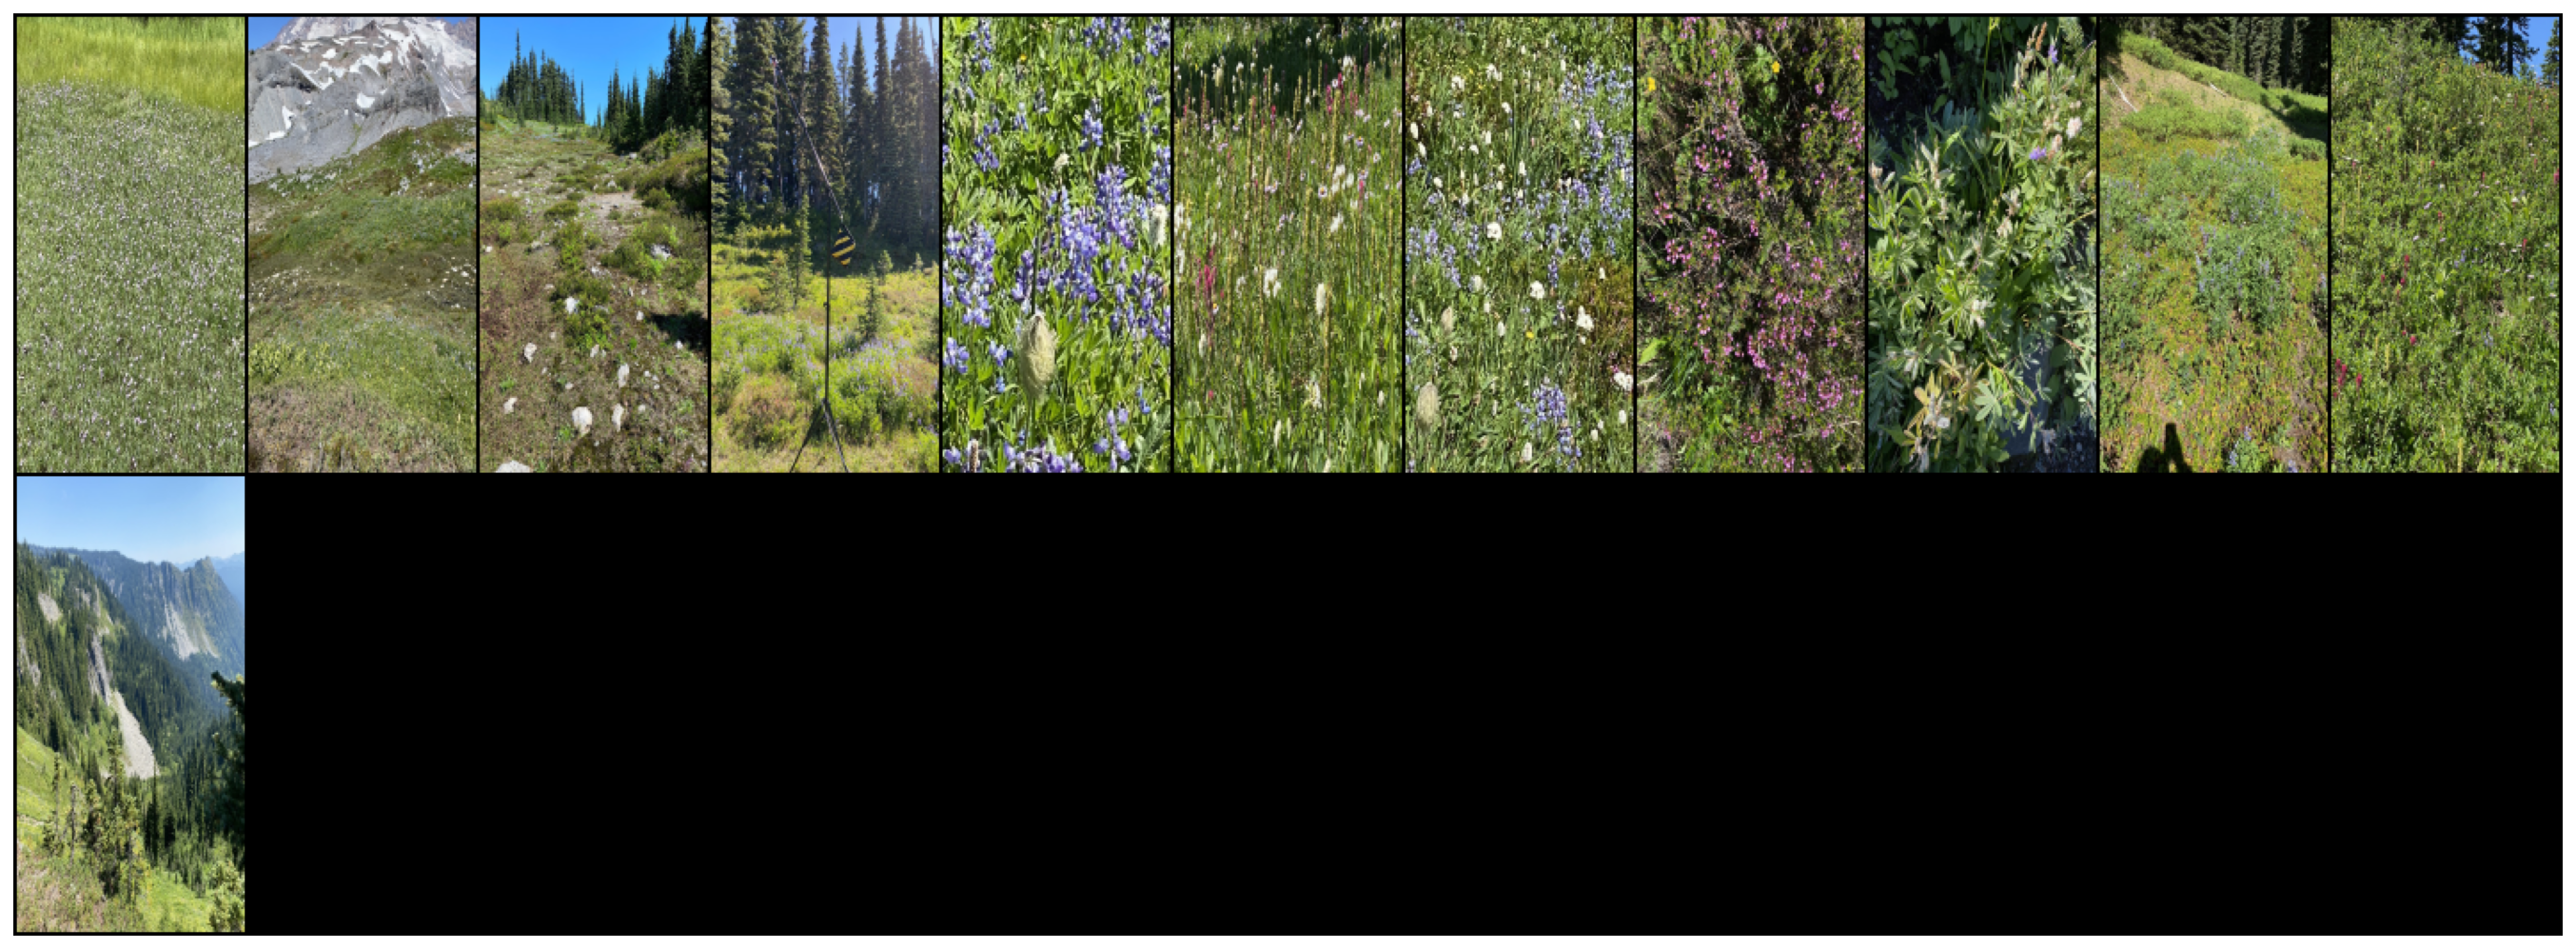

In [ ]:
img_paths = list(Path("inference/output").glob("*.jpg"))
show_grid(img_paths)